# Gráficos e valores para o post

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from src.metricas import calculate_wcss, optimal_number_of_clusters


iris = sns.load_dataset('iris')
df = iris.drop('species', axis=1)
species_encoded = LabelEncoder().fit_transform(iris['species'])

sum_of_squares = calculate_wcss(df)
n = optimal_number_of_clusters(sum_of_squares)

kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit_predict(df)

x1, x2 = 2, 20
intervalo = range(x1,x2+1)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Gráfico 1

Gráfico do método cotovelo com os pontos nomeados

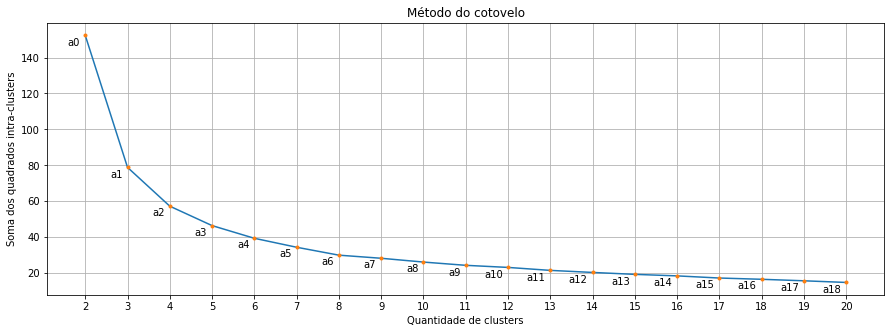

In [2]:
plt.figure(figsize=(15,5))
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.grid()
plt.xticks(intervalo)
plt.plot(intervalo, sum_of_squares) # pontos laranjas
plt.plot(intervalo, sum_of_squares, '.') # linha azul
for x,y in zip(intervalo,sum_of_squares): # colocando nome nos pontos
    label = "a{}".format(x-2)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(-5,-10),
                 ha='right')
plt.show()

## Gráfico 2

Reta traçada entre os pontos `a0` e `a18`

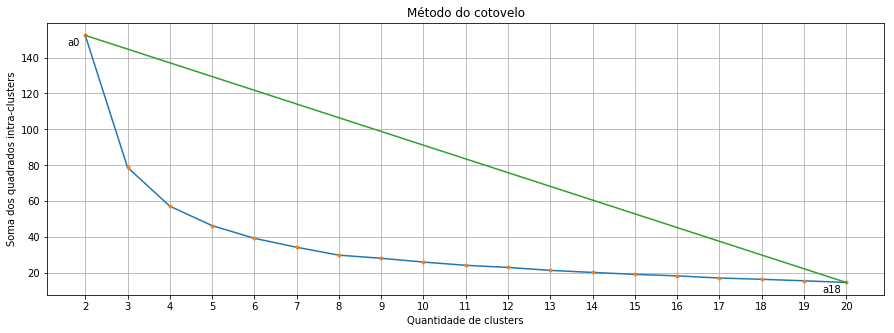

In [3]:
plt.figure(figsize=(15,5))
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.grid()
plt.xticks(intervalo)
plt.plot(intervalo, sum_of_squares) # pontos laranjas
plt.plot(intervalo, sum_of_squares, '.') # linha azul

y2 = sum_of_squares[len(sum_of_squares)-1]
y1 = sum_of_squares[0]

plt.plot([x2, x1], [y2,y1]) # linha verde

for x,y in zip(intervalo,sum_of_squares): # colocando nome nos pontos
    if x < 3 or x > 19:
        label = "a{}".format(x-2)
        plt.annotate(label,
                     (x,y),
                     textcoords="offset points",
                     xytext=(-5,-10),
                     ha='right')
plt.show()

## Gráfico 3

Gráfico com a linha base para o cálculo da distância e pontos `a0`, `a1` e `a18` anotados.

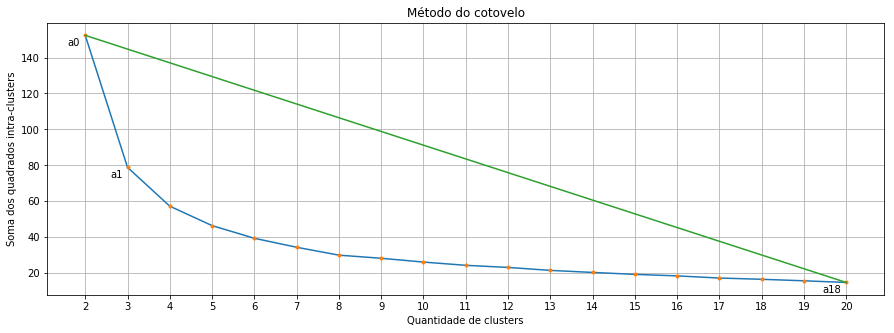

In [4]:
plt.figure(figsize=(15,5))
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.grid()
plt.xticks(intervalo)
plt.plot(intervalo, sum_of_squares)      # pontos laranjas
plt.plot(intervalo, sum_of_squares, '.') # linha azul
plt.plot([x2, x1], [y2,y1])                   # linha verde
for x,y in zip(intervalo,sum_of_squares):   # colocando nome nos pontos
    label = "a{}".format(x-2)
    if label in ['a0', 'a1', 'a18']:
        plt.annotate(label,
                     (x,y),
                     textcoords="offset points",
                     xytext=(-5,-10),
                     ha='right')
plt.show()

## Valores para o cálculo da distância de a1 até a reta 

In [5]:
for x,y in zip(intervalo, sum_of_squares):   # colocando nome nos pontos
    label = "a{}".format(x-2)
    if label in ['a0', 'a1', 'a18']:
        print('label:', label)
        print('x:', x)
        print('y:', y)
        print()

label: a0
x: 2
y: 152.34795176

label: a1
x: 3
y: 78.8514414261

label: a18
x: 20
y: 14.8008492063



## Descritivo

Olhando para média e desvio padrão nos nossos dados

In [6]:
grouped_by_species = iris.groupby('species')
filtro = grouped_by_species.describe().columns.get_level_values(1).isin(['mean', 'std', 'count'])
grouped_by_species.describe().iloc[:, filtro]

petal_length                  petal_width                   \
                  count   mean       std       count   mean       std   
species                                                                 
setosa             50.0  1.462  0.173664        50.0  0.246  0.105386   
versicolor         50.0  4.260  0.469911        50.0  1.326  0.197753   
virginica          50.0  5.552  0.551895        50.0  2.026  0.274650   

           sepal_length                  sepal_width                   
                  count   mean       std       count   mean       std  
species                                                                
setosa             50.0  5.006  0.352490        50.0  3.428  0.379064  
versicolor         50.0  5.936  0.516171        50.0  2.770  0.313798  
virginica          50.0  6.588  0.635880        50.0  2.974  0.322497

In [7]:
iris['clusters'] = clusters
grouped_by_clusters = iris.drop('species', axis=1).groupby('clusters')

filtro = grouped_by_clusters.describe().columns.get_level_values(1).isin(['mean', 'std', 'count'])
grouped_by_clusters.describe().iloc[:, filtro]

petal_length                     petal_width                      \
                count      mean       std       count      mean       std   
clusters                                                                    
0                38.0  5.742105  0.488590        38.0  2.071053  0.279872   
1                50.0  1.462000  0.173664        50.0  0.246000  0.105386   
2                62.0  4.393548  0.508895        62.0  1.433871  0.297500   

         sepal_length                     sepal_width                      
                count      mean       std       count      mean       std  
clusters                                                                   
0                38.0  6.850000  0.494155        38.0  3.073684  0.290092  
1                50.0  5.006000  0.352490        50.0  3.428000  0.379064  
2                62.0  5.901613  0.466410        62.0  2.748387  0.296284

## Gráfico 4

Gráfico com os comprimento pela largura de pétalas, as cores representam as espécies que vem com o cojunto de dados de iris(Antes) e os clusters encontrados pelo KMeans (Depois).

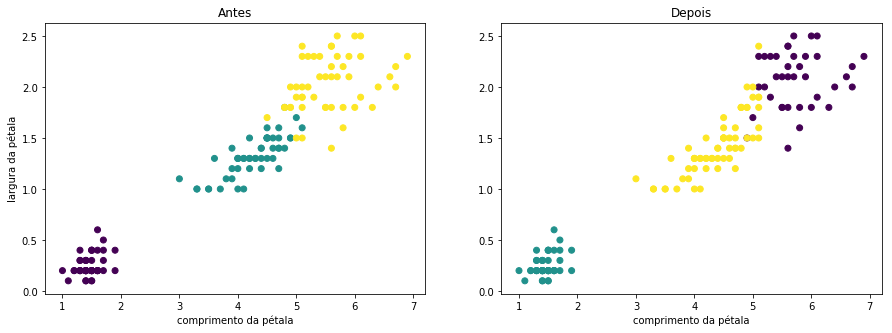

In [8]:
iris['species_encoded'] = LabelEncoder().fit_transform(iris['species'])
df_clusters = iris[['species_encoded', 'clusters']]
df_clusters.columns = ['antes', 'depois']

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('Antes')
plt.xlabel('comprimento da pétala')
plt.ylabel('largura da pétala')
plt.scatter(iris['petal_length'],iris['petal_width'], c=df_clusters['antes'])


plt.subplot(1, 2, 2)
plt.title('Depois')
plt.xlabel('comprimento da pétala')
plt.scatter(iris['petal_length'],iris['petal_width'], c=df_clusters['depois'])

plt.show()

## Gráfico 5

Não utilizado

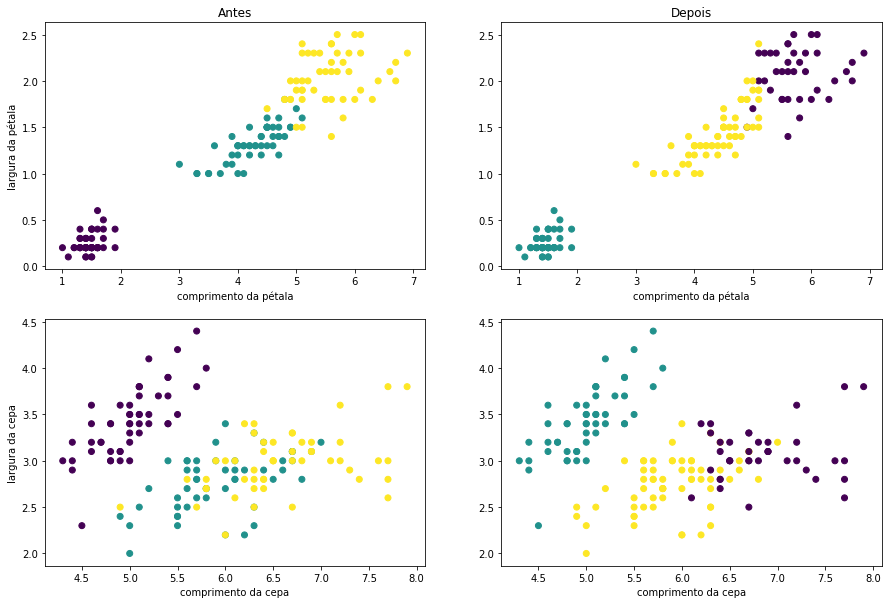

In [9]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.title('Antes')
plt.xlabel('comprimento da pétala')
plt.ylabel('largura da pétala')
plt.scatter(iris['petal_length'],iris['petal_width'], c=df_clusters['antes'])


plt.subplot(2, 2, 2)
plt.title('Depois')
plt.xlabel('comprimento da pétala')
plt.scatter(iris['petal_length'],iris['petal_width'], c=df_clusters['depois'])


plt.subplot(2, 2, 3)
plt.xlabel('comprimento da cepa')
plt.ylabel('largura da cepa')
plt.scatter(iris['sepal_length'],iris['sepal_width'], c=df_clusters['antes'])


plt.subplot(2, 2, 4)
plt.xlabel('comprimento da cepa')
plt.scatter(iris['sepal_length'],iris['sepal_width'], c=df_clusters['depois'])

plt.show()